과제
imdb 데이터를 가지고 RNN을 통해 구현해보기

- RNN은 Sequence data(순차적 데이터) / Language data(자연어) 처리하는 데에 이용하는 데에 특화됨

# IMDB Datasets

In [12]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [13]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [14]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 8s 72ms/step - loss: 0.5724 - acc: 0.7050 - val_loss: 0.3815 - val_acc: 0.8712
Epoch 2/5
118/118 [==============================] - 2s 19ms/step - loss: 0.3738 - acc: 0.8575 - val_loss: 0.2850 - val_acc: 0.8852
Epoch 3/5
118/118 [==============================] - 2s 16ms/step - loss: 0.2775 - acc: 0.9029 - val_loss: 0.2757 - val_acc: 0.8858
Epoch 4/5
118/118 [==============================] - 2s 14ms/step - loss: 0.2213 - acc: 0.9208 - val_loss: 0.2879 - val_acc: 0.8877
Epoch 5/5
118/118 [==============================] - 2s 14ms/step - loss: 0.1961 - acc: 0.9329 - val_loss: 0.3067 - val_acc: 0.8864


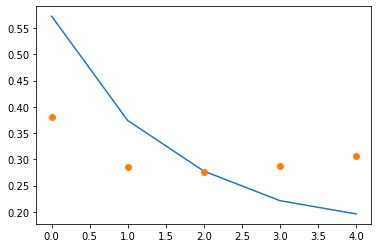

In [16]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [17]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.3224 - acc: 0.8780


 # IMDB Classification using simple RNN

In [35]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length(리뷰들의 단어 수를 일정하게 만드는 과정)
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [36]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32])

In [37]:
X_train.shape

(25000, 100)

In [41]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 긴 시퀀스를 rnn에서 다룰 수 있는 데이터를 바꾸어주는 과정
# 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) # 다층 RNN를 하기 위해 return_sequences = True로 설정
rnn.add(layers.Dropout(0.2))
rnn.add(layers.SimpleRNN(16))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['acc'])

In [42]:
rnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, None, 32)          1568      
_________________________________________________________________
dropout_18 (Dropout)         (None, None, 32)          0         
_________________________________________________________________
simple_rnn_20 (SimpleRNN)    (None, 16)                784       
_________________________________________________________________
dropout_19 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 162,369
Trainable params: 162,369
Non-trainable params: 0
_______________________________________________

In [43]:
history = rnn.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 80ms/step - loss: 0.6965 - acc: 0.5306 - val_loss: 0.6612 - val_acc: 0.6088
Epoch 2/10
157/157 [==============================] - 12s 77ms/step - loss: 0.5064 - acc: 0.7589 - val_loss: 0.7553 - val_acc: 0.6502
Epoch 3/10
157/157 [==============================] - 12s 77ms/step - loss: 0.3594 - acc: 0.8511 - val_loss: 0.5385 - val_acc: 0.7970
Epoch 4/10
157/157 [==============================] - 12s 76ms/step - loss: 0.2669 - acc: 0.9006 - val_loss: 0.4148 - val_acc: 0.8206
Epoch 5/10
157/157 [==============================] - 12s 76ms/step - loss: 0.1921 - acc: 0.9336 - val_loss: 0.5341 - val_acc: 0.7892
Epoch 6/10
157/157 [==============================] - 12s 76ms/step - loss: 0.1285 - acc: 0.9583 - val_loss: 0.5189 - val_acc: 0.8252
Epoch 7/10
157/157 [==============================] - 12s 79ms/step - loss: 0.0783 - acc: 0.9772 - val_loss: 0.6523 - val_acc: 0.8186
Epoch 8/10
157/157 [==============================] - 12s 79ms

In [49]:
rnn.evaluate(X_test, y_test)[0] # test set의 정확도

782/782 [==============================] - 12s 15ms/step - loss: 0.9482 - acc: 0.7517 2s - loss:  - ETA


0.9481979012489319